<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 18** | Regressão Logística I
Caderno de **exercício 02**<br>



## Discente: Samuel Saturno

### Importando as Bibliotecas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

from sklearn import metrics
from scipy.stats import ks_2samp

%matplotlib inline

### Carregando o Banco de Dados

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [8]:
# Imprime um resumo conciso do DataFrame, incluindo informações sobre colunas não nulas, tipos de dados e uso de memória.
print(df.info())

# Calcula e imprime a quantidade de linhas duplicadas no DataFrame.
print('Quantidade de linhas duplicadas:', df.duplicated().sum())

# Calcula estatísticas resumidas para cada coluna numérica do DataFrame.
# Isso inclui contagem, média, desvio padrão, mínimo, quartis e máximo.
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB
None
Quantidade de linhas duplicadas: 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [11]:
def bivariada_qualitativa(dataframe: pd.DataFrame, x: str, y: str) -> pd.DataFrame:
    # Constrói uma tabela de contingência cruzada entre as variáveis x e y,
    # mostrando as frequências de cada combinação de valores.
    tabela_cruzada = pd.crosstab(index=dataframe[x],
                                 columns=dataframe[y],
                                 margins=True,
                                 margins_name='total')

    # Calcula a probabilidade condicional de Y=1 dado X.
    tabela_cruzada['prob'] = tabela_cruzada[1] / tabela_cruzada['total']

    # Calcula a razão de chances (odds) de Y=1 para cada categoria de X.
    tabela_cruzada['odds'] = tabela_cruzada[1] / tabela_cruzada[0]

    # Calcula o odds ratio, uma medida de associação entre as duas variáveis categóricas.
    tabela_cruzada['odds_ratio'] = tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds']

    # Calcula o logito, que é o logaritmo natural da razão de chances (odds).
    tabela_cruzada['logito'] = np.log(tabela_cruzada['odds'])

    # Calcula o Weight of Evidence (WOE), uma medida usada em modelagem preditiva.
    tabela_cruzada['WOE'] = np.log(tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds'])

    return tabela_cruzada


In [10]:
# Chamando a função bivariada_qualitativa para analisar a relação entre as variáveis 'sex' e 'flag_doente'.
# Passando o DataFrame df e especificando 'sex' como variável X e 'flag_doente' como variável Y.
bivariada_qualitativa(dataframe=df, x='sex', y='flag_doente')


flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


### Insight 01:

* Associação entre gênero e doença cardíaca:

Ao analisar a distribuição de casos de doença cardíaca por gênero, observamos que os homens (sexo 1.0) têm uma probabilidade de 55.34% de serem diagnosticados com doença cardíaca, em comparação com 25.77% das mulheres (sexo 0.0). Isso indica uma associação significativa entre o sexo masculino e um maior risco de doença cardíaca.


Além disso:

* A razão de chances (odds) de um homem ser diagnosticado com doença cardíaca em relação a uma mulher é de aproximadamente 1.46, indicando uma maior probabilidade de diagnóstico para os homens.

* O odds ratio (razão de chances) ajustado é de aproximadamente 1.46, sugerindo que os homens têm 1.46 vezes mais chances de serem diagnosticados com doença cardíaca em comparação com as mulheres, considerando outros fatores.

* O logito (logaritmo natural da razão de chances) é positivo para o sexo masculino (0.214), o que indica uma associação positiva entre o sexo masculino e a doença cardíaca.

* O WOE (Weight of Evidence) para o sexo masculino é positivo (0.38), indicando que o sexo masculino está associado a um aumento no risco de doença cardíaca em comparação com a média geral.

In [12]:
# Chamando a função bivariada_qualitativa para analisar a relação entre as variáveis 'cp' e 'flag_doente'.
# Passando o DataFrame df e especificando 'cp' como variável X e 'flag_doente' como variável Y.
bivariada_qualitativa(dataframe=df, x='cp', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


### Insight 02:

* Associação entre o tipo de dor no peito (cp) e doença cardíaca:

Observamos uma variação significativa na distribuição de casos de doença cardíaca entre os diferentes tipos de dor no peito. Aqui estão as

* principais observações:

1. Tipo de dor no peito assintomático (valor 4): Este tipo de dor no peito apresenta uma probabilidade de 72.92% de estar associado a doença cardíaca. Além disso, a razão de chances (odds) é de aproximadamente 2.69 em comparação com os outros tipos de dor no peito, indicando uma forte associação com a doença cardíaca. O odds ratio ajustado é de aproximadamente 3.18, sugerindo que os pacientes com esse tipo de dor têm cerca de 3.18 vezes mais chances de serem diagnosticados com doença cardíaca em comparação com aqueles sem dor no peito.

2. Outros tipos de dor no peito (valores 1, 2 e 3): Os outros tipos de dor no peito (valores 1, 2 e 3) apresentam uma probabilidade de estar associados à doença cardíaca significativamente menor em comparação com o tipo de dor no peito assintomático. A razão de chances (odds) e o odds ratio ajustado para esses tipos de dor são menores, indicando uma associação mais fraca com a doença cardíaca.


In [13]:
# Chamando a função bivariada_qualitativa para analisar a relação entre as variáveis 'exang' e 'flag_doente'.
# Passando o DataFrame df e especificando 'exang' como variável X e 'flag_doente' como variável Y.
bivariada_qualitativa(dataframe=df, x='exang', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


### Insight 03:

* Associação entre a angina induzida por exercício (exang) e doença cardíaca:

A presença de angina induzida por exercício (exang = 1.0) está fortemente associada a um maior risco de doença cardíaca. Aqui estão as principais observações:


1. Angina não induzida por exercício (exang = 0.0): A probabilidade de doença cardíaca para pacientes sem angina induzida por exercício é de 30.88%. A razão de chances (odds) é de aproximadamente 0.45 em comparação com os pacientes com angina induzida por exercício, indicando uma associação negativa com a doença cardíaca. O odds ratio ajustado é de aproximadamente 0.53, sugerindo que os pacientes sem angina induzida por exercício têm cerca de 0.53 vezes menos chances de serem diagnosticados com doença cardíaca em comparação com aqueles com angina induzida por exercício.

2. Angina induzida por exercício (exang = 1.0): A probabilidade de doença cardíaca para pacientes com angina induzida por exercício é significativamente maior, atingindo 76.77%. A razão de chances (odds) é de aproximadamente 3.30 em comparação com os pacientes sem angina induzida por exercício, indicando uma associação positiva forte com a doença cardíaca. O odds ratio ajustado é de aproximadamente 3.90, sugerindo que os pacientes com angina induzida por exercício têm cerca de 3.90 vezes mais chances de serem diagnosticados com doença cardíaca em comparação com aqueles sem angina induzida por exercício.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [54]:
# Esta função calcula várias estatísticas para uma relação bivariada quantitativa entre duas variáveis em um DataFrame.

def bivariada_quantitativa(dataframe:pd.DataFrame,
                           x:str,
                           y:str,
                           q:int=5
                          ) -> pd.DataFrame:

    # Calcula a tabela cruzada entre as variáveis x e y, incluindo totais.
    tabela_cruzada = (pd.crosstab(index=dataframe[x],
                                  columns=dataframe[y],
                                  margins=True,
                                  margins_name='total')
                        # Agrupa os dados pelos quantis de x.
                        .groupby(by=pd.qcut(x=dataframe[x],
                                            q=q))
                        # Agrega os grupos calculando a soma.
                        .agg(func='sum'))

    # Adiciona uma linha com os totais de cada coluna.
    tabela_cruzada = pd.concat(objs=[tabela_cruzada,
                                     pd.DataFrame(data=tabela_cruzada.sum(),
                                                  columns=['total']).T])

    # Define o nome do índice como o nome da variável x.
    tabela_cruzada.index.name = x

    # Calcula a probabilidade de ocorrência de y para cada intervalo de quantil de x.
    tabela_cruzada['prob'] = tabela_cruzada[1] / tabela_cruzada['total']

    # Calcula a razão de chances (odds) para cada intervalo de quantil de x.
    tabela_cruzada['odds'] = tabela_cruzada[1] / tabela_cruzada[0]

    # Calcula o "odds ratio" comparado com a média global.
    tabela_cruzada['odds_ratio'] = tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds']

    # Calcula o logaritmo natural dos "odds".
    tabela_cruzada['logito'] = np.log(tabela_cruzada['odds'])

    # Calcula o Weight of Evidence (WOE) para cada intervalo de quantil de x.
    tabela_cruzada['WOE'] = np.log(tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds'])

    # Criar grupos quantis usando pd.qcut() e calcular a média de 'age' em cada grupo*
    media_quantitativa_por_grupo = dataframe.groupby(pd.qcut(dataframe[x], q)).agg({'age': 'mean'})

    # Atribuir as médias calculadas* à coluna 'media_quantitativa' da tabela cruzada*
    tabela_cruzada['media_quantitativa'] = media_quantitativa_por_grupo['age']

    # Calcula a média global de x e a atribui à linha de totais na coluna de média quantitativa.
    tabela_cruzada.loc['total', 'media_quantitativa'] = dataframe[x].mean()

    # Arredonda os valores da média quantitativa para números inteiros.
    tabela_cruzada['media_quantitativa'] = round(tabela_cruzada['media_quantitativa'])

    # Retorna o DataFrame resultante com todas as estatísticas calculadas.
    return tabela_cruzada


In [55]:
# Chamando a função 'bivariada_quantitativa' com os seguintes parâmetros:
# - dataframe=df: O DataFrame onde os dados estão armazenados.
# - x='age': A coluna no DataFrame que representa a variável independente, neste caso, a idade.
# - y='flag_doente': A coluna no DataFrame que representa a variável dependente, neste caso, um indicador se a pessoa está doente ou não.
bivariada_quantitativa(dataframe=df, x='age', y='flag_doente')


flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE,media_quantitativa
age,,,,,,,,,
"(28.999, 45.0]",41,22,63,0.349206,0.536585,0.633094,-0.622530,-0.457137,41.0
"(45.0, 53.0]",26,40,66,0.606061,1.538462,1.815163,0.430783,0.596175,50.0
"(53.0, 58.0]",35,43,78,0.551282,1.228571,1.449538,0.205852,0.371245,56.0
"(58.0, 62.0]",37,22,59,0.372881,0.594595,0.701536,-0.519875,-0.354483,60.0
"(62.0, 77.0]",25,12,37,0.324324,0.480000,0.566331,-0.733969,-0.568577,67.0
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.0


### Insight 04:

* Associação entre a idade (age) e doença cardíaca: Ao analisar a distribuição de casos de doença cardíaca por faixas etárias, observamos as seguintes tendências:


1. Faixa etária mais jovem (28.999 - 45.0 anos): Nesta faixa etária, a probabilidade de doença cardíaca é de 34.92%. A razão de chances (odds) é de aproximadamente 0.54 em comparação com as outras faixas etárias, indicando uma associação negativa com a doença cardíaca. O odds ratio ajustado é de aproximadamente 0.63, sugerindo que os indivíduos nessa faixa etária têm cerca de 0.63 vezes menos chances de serem diagnosticados com doença cardíaca em comparação com outras faixas etárias.

2. Faixas etárias intermediárias (45.0 - 62.0 anos): Nestas faixas etárias intermediárias, observamos uma probabilidade de doença cardíaca variando de 37.29% a 60.61%. A razão de chances (odds) e o odds ratio ajustado são superiores a 1, indicando uma associação positiva com a doença cardíaca. Isso sugere que os indivíduos nessas faixas etárias têm maior probabilidade de serem diagnosticados com doença cardíaca em comparação com outras faixas etárias.

3. Faixa etária mais avançada (62.0 - 77.0 anos): Nesta faixa etária mais avançada, a probabilidade de doença cardíaca é de 32.43%. Embora a razão de chances (odds) e o odds ratio ajustado sejam inferiores a 1, indicando uma associação negativa, a diferença é menos pronunciada em comparação com a faixa etária mais jovem.

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [57]:
# Ajuste um modelo de regressão logística aos dados
# A variável dependente é 'flag_doente' e as variáveis independentes são 'sex', 'cp', 'trestbps' e 'age'
# A variável 'cp' é tratada como uma variável categórica com 4 categorias e o tratamento base é a categoria de referência 4
# O modelo é ajustado aos dados do DataFrame df
reglog = smf.logit(formula='''flag_doente ~
                              sex
                              + C(cp, Treatment(reference=4))
                              + trestbps
                              + age
                              ''', data=df).fit()

# Exiba um resumo do ajuste do modelo de regressão logística
reglog.summary()


Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
CPU times: user 38.8 ms, sys: 4.86 ms, total: 43.6 ms
Wall time: 45.9 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.3097
Time:                        08:09:32   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -5.8619      1.413     -4.147      0.000      -8.632      -3.092
C(cp, Treatment(reference=4))[T.1.0]    -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(reference=4))[T.2.0]    -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(reference=4))[T.3.0]    -2.4074      0.360     -6.690      0.000      -3.113      -1.702
sex                                      1.8094      0.353      5.130      0.000       1.118       2.501
trestbps                                 0.0193      0.009      2.261      0.024       0.003       0.036
age                                      0.0567      0.018      3.120      0.002       0.021       0.092
========================================================================================================
"""

In [58]:
# Calcula e imprime a razão de chances do perfil masculino para doença cardíaca
# O valor 1.8094 é o coeficiente estimado para a variável 'sex' no modelo de regressão logística
# Utilizamos a função np.exp() para exponenciar o coeficiente e obter a razão de chances
# A razão de chances é arredondada para 2 casas decimais para maior legibilidade
print(f'A razão de chance do perfil masculino para doença cardíaca é de {round(np.exp(1.8094), 2)} vezes com relação ao perfil feminino.\n')

# Calcula e imprime a razão de chances de diferentes tipos de dor no peito em comparação com a dor no peito assintomática (valor 4)
# Os valores -2.4789, -2.5406 e -2.4074 são os coeficientes estimados para as variáveis categóricas 'cp' no modelo de regressão logística
# Utilizamos a função np.exp() para exponenciar os coeficientes e obter as razões de chances
# As razões de chances são arredondadas para 4 casas decimais para maior legibilidade
print(f'A razão de chance do perfil com angina típica (valor 1) é de {round(np.exp(-2.4789), 4)} vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).\n')
print(f'A razão de chance do perfil com angina atípica (valor 2) é de {round(np.exp(-2.5406), 4)} vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).\n')
print(f'A razão de chance do perfil com dor não-angina (valor 3) é de {round(np.exp(-2.4074), 4)} vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).\n')

# Calcula e imprime a razão de chances do aumento da pressão sanguínea na admissão ao hospital
# O valor 0.0193 é o coeficiente estimado para a variável 'trestbps' no modelo de regressão logística
# Utilizamos a função np.exp() para exponenciar o coeficiente e obter a razão de chances
# A razão de chances é arredondada para 2 casas decimais para maior legibilidade
print(f'A razão de chance aumenta {round(np.exp(0.0193), 2)} para cada milímetro de mercúrio (mmHg) da pressão sanguínea na admissão ao hospital.\n')

# Calcula e imprime a razão de chances do aumento da idade
# O valor 0.0567 é o coeficiente estimado para a variável 'age' no modelo de regressão logística
# Utilizamos a função np.exp() para exponenciar o coeficiente e obter a razão de chances
# A razão de chances é arredondada para 2 casas decimais para maior legibilidade
print(f'A razão de chance aumenta {round(np.exp(0.0567), 2)} para cada ano da idade.\n')


A razão de chance do perfil masculino para doença cardíaca é de 6.11 vezes com relação ao perfil feminino.

A razão de chance do perfil com angina típica (valor 1) é de 0.0838 vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).

A razão de chance do perfil com angina atípica (valor 2) é de 0.0788 vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).

A razão de chance do perfil com dor não-angina (valor 3) é de 0.09 vezes com relação ao perfil com tipo de dor no peito assintomático (valor 4).

A razão de chance aumenta 1.02 para cada milímetro de mercúrio (mmHg) da pressão sanguínea na admissão ao hospital.

A razão de chance aumenta 1.06 para cada ano da idade.



### Insight 05:

* Diferença de gênero na suscetibilidade à doença cardíaca:

A razão de chance do perfil masculino para doença cardíaca é de 6.11 vezes maior do que o perfil feminino. Isso sugere uma diferença significativa na incidência de doença cardíaca entre os gêneros.

* Impacto dos diferentes tipos de dor no peito na doença cardíaca:

A presença de angina típica, angina atípica ou dor não-angina está associada a uma menor probabilidade de desenvolver doença cardíaca em comparação com o tipo de dor no peito assintomático. Essas diferenças nas razões de chance indicam a importância de considerar os sintomas específicos ao avaliar o risco de doença cardíaca.

* Influência da pressão sanguínea na admissão ao hospital e idade:

Cada milímetro de mercúrio (mmHg) na pressão sanguínea na admissão ao hospital está associado a um aumento de 1.02 vezes na razão de chance de desenvolver doença cardíaca. Além disso, a razão de chance aumenta em 1.06 para cada ano de idade. Isso ressalta a importância de monitorar esses fatores de risco ao avaliar a probabilidade de desenvolver doença cardíaca.



4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [63]:
# Calculando a probabilidade de evento predita segundo o modelo:
df['predito'] = reglog.predict(exog=df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,0.134492
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,0.929259
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,0.843216
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,0.064913


In [64]:
# Calcula os grupos quantis da variável 'predito' usando a função pd.qcut()
# Divide os valores da variável 'predito' em 5 grupos com tamanhos aproximadamente iguais
# Isso é feito para criar faixas de valores preditos que podem ser comparadas entre si
pred_cat = pd.qcut(x=df['predito'], q=5)

# Agrupa o DataFrame df pelos grupos quantis da variável 'predito'
# Isso nos permite realizar operações agregadas em cada grupo
group_reg = df.groupby(by=pred_cat)

# Calcula a contagem de valores na coluna 'flag_doente' para cada grupo de predição
# Renomeia a coluna resultante para 'contagem' para melhor legibilidade
qualid = (group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'}))

# Retorna o DataFrame 'qualid' contendo as contagens de valores da variável 'flag_doente' para cada grupo de predição
# Esse DataFrame pode ser útil para avaliar a distribuição das previsões e sua relação com a variável alvo 'flag_doente'
qualid


,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [65]:
# Calcula a média dos valores da variável 'predito' para cada grupo de predição
# Isso é feito usando o método .mean() aplicado ao grupo 'group_reg' na coluna 'predito'
# A média é atribuída à nova coluna 'predito' no DataFrame 'qualid'
qualid['predito'] = group_reg['predito'].mean()

# Retorna o DataFrame 'qualid' com a nova coluna 'predito' contendo as médias dos valores de 'predito' para cada grupo de predição
# Isso pode ser útil para examinar a tendência média de predições em cada grupo e sua relação com a variável alvo 'flag_doente'
qualid


,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [66]:
# Calcula a média da variável 'flag_doente' para cada grupo de predição
# Isso é feito usando o método .mean() aplicado ao grupo 'group_reg' na coluna 'flag_doente'
# A média é atribuída à nova coluna 'pct_doente' no DataFrame 'qualid'
qualid['pct_doente'] = group_reg['flag_doente'].mean()

# Retorna o DataFrame 'qualid' com a nova coluna 'pct_doente' contendo as médias da variável 'flag_doente' para cada grupo de predição
# Isso pode ser útil para analisar a proporção média de casos de doença para cada grupo de predição
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


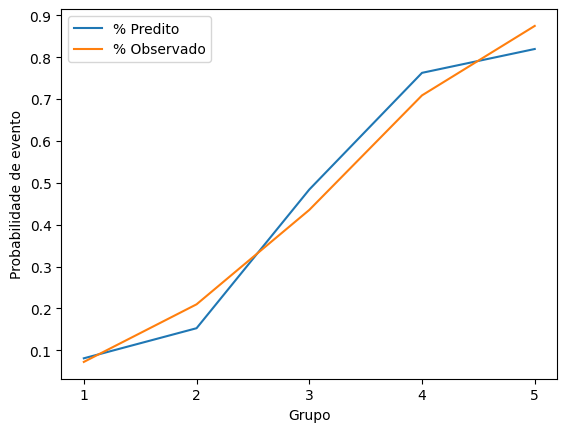

In [68]:
# Cria uma nova figura para o gráfico
fig = plt.figure()

# Adiciona um subplot à figura com uma única linha e uma única coluna
ax = fig.add_subplot(1, 1, 1)

# Plota a coluna 'pct_doente' do DataFrame 'qualid' no eixo y e usa 'Grupo' no eixo x
# A linha é rotulada como '% Predito' para representar a probabilidade de evento prevista
ax = qualid['pct_doente'].plot(label='% Predito')

# Plota a coluna 'predito' do DataFrame 'qualid' no mesmo eixo y
# A linha é rotulada como '% Observado' para representar a probabilidade de evento observada
ax = qualid['predito'].plot(label='% Observado')

# Define os ticks (marcas) e rótulos dos ticks no eixo x para melhor legibilidade
ticks = ax.set_xticks(ticks=[0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])

# Adiciona uma legenda ao gráfico
ax.legend()

# Define o rótulo do eixo x como 'Grupo' e o rótulo do eixo y como 'Probabilidade de evento'
ax.set_xlabel(xlabel='Grupo')
ax.set_ylabel(ylabel='Probabilidade de evento')

# Exibe o gráfico
plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [69]:
# Acurácia
# Calcula a acurácia comparando as previsões com a variável alvo 'flag_doente'
# Se o valor previsto for maior que 0,5, é considerado como 1 (doente), caso contrário, é considerado como 0 (não doente)
# A função metrics.accuracy_score() retorna a proporção de previsões corretas
# A acurácia é expressa como uma porcentagem e é impressa na tela
acc = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# AUC
# Calcula a curva ROC (Receiver Operating Characteristic) e a área sob a curva (AUC)
# A curva ROC é uma representação gráfica da taxa de verdadeiros positivos (sensibilidade) versus a taxa de falsos positivos (1-especificidade)
# A função metrics.roc_curve() retorna taxas de falsos positivos (fpr), taxas de verdadeiros positivos (tpr) e limiares utilizados na curva ROC
# A função metrics.auc() calcula a área sob a curva ROC
# O valor AUC é utilizado como medida de desempenho do modelo, com um valor maior indicando melhor discriminação entre classes
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# GINI
# Calcula o índice de Gini, uma medida de desigualdade, a partir da área sob a curva ROC
# O índice de Gini é calculado como o dobro da área sob a curva ROC menos 1
# Ele fornece uma medida da capacidade discriminativa do modelo, sendo 0 para um modelo aleatório e 1 para um modelo perfeito
gini = 2 * auc_ - 1

# KS
# Calcula a estatística KS (Kolmogorov-Smirnov), uma medida de divergência entre duas distribuições de probabilidade acumulada
# A estatística KS é calculada comparando as distribuições de probabilidade acumulada dos valores previstos para as classes positiva e negativa
# Ela fornece uma medida da capacidade discriminativa do modelo, com um valor maior indicando melhor separação entre as classes
# A função ks_2samp() da biblioteca scipy.stats realiza o cálculo da estatística KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

# Imprime as métricas de avaliação do modelo
# Imprime o valor do índice de Gini e o valor da estatística KS
print(f'GINI: {gini*100:.2f}%')
print(f'KS: {ks*100:.2f}%')


Acurácia: 79.54%
GINI: 70.39%
KS: 59.30%


### Insight 06:

* Acurácia: 79.54%: A acurácia representa a proporção de previsões corretas feitas pelo modelo. Neste caso, uma acurácia de 79.54% indica que o modelo classificou corretamente cerca de 79.54% dos casos em relação ao total.

* GINI: 70.39%: O índice GINI é uma medida de desempenho comum para modelos de classificação binária, especialmente em problemas de crédito e risco. Quanto mais próximo de 100%, melhor o modelo em separar as classes de forma distinta. Um valor de GINI de 70.39% sugere que o modelo possui uma capacidade bastante boa de separar as classes positivas e negativas.

* KS (Kolmogorov-Smirnov): 59.30%: O KS é uma medida que indica a discrepância máxima entre as funções de distribuição acumulada das classes positivas e negativas. É uma medida comum em modelagem estatística e é frequentemente usada para avaliar a qualidade de um modelo de classificação. Um valor de KS de 59.30% sugere que o modelo está conseguindo distinguir bem as duas classes.

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [70]:
# Ajusta um modelo de regressão logística usando a função logit do statsmodels.formula.api
# A variável dependente é 'flag_doente' e as variáveis independentes são 'age', 'sex', 'cp', 'thalach', 'exang' e 'oldpeak'
# 'cp' é tratada como uma variável categórica com 4 categorias, e a categoria de referência é definida como 4
# O modelo é ajustado aos dados do DataFrame 'df'
reglog = smf.logit(formula='''flag_doente
                            ~ age
                            + sex
                            + C(cp, Treatment(reference=4))
                            + thalach
                            + exang
                            + oldpeak
                            ''',
                   data=df).fit()

# Exibe um resumo dos resultados do ajuste do modelo de regressão logística
# Isso inclui estatísticas de coeficientes, desempenho do ajuste, p-valores e intervalos de confiança
# O resumo é útil para avaliar a significância estatística das variáveis independentes e a qualidade do ajuste do modelo
reglog.summary()


Optimization terminated successfully.
         Current function value: 0.414266
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.3994
Time:                        08:32:53   Log-Likelihood:                -125.52
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.652e-32
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.6474      2.025     -0.320      0.749      -4.617       3.322
C(cp, Treatment(reference=4))[T.1.0]    -2.1539      0.594     -3.625      0.000      -3.319      -0.989
C(cp, Treatment(reference=4))[T.2.0]    -1.4851      0.485     -3.065      0.002      -2.435      -0.535
C(cp, Treatment(reference=4))[T.3.0]    -1.9797      0.405     -4.893      0.000      -2.773      -1.187
age                                      0.0394      0.020      1.984      0.047       0.000       0.078
sex                                      1.6929      0.379      4.463      0.000       0.949       2.436
thalach                                 -0.0192      0.009     -2.207      0.027      -0.036      -0.002
exang                                    0.8612      0.366      2.354      0.019       0.144       1.578
oldpeak                                  0.6968      0.170      4.108      0.000       0.364       1.029
========================================================================================================
"""

In [71]:
# Calcula as probabilidades previstas pelo modelo de regressão logística para os dados do DataFrame 'df'
# Essas probabilidades são atribuídas à nova coluna 'predito' no DataFrame 'df'
df['predito'] = reglog.predict(exog=df)

# Categoriza as probabilidades previstas em 5 grupos usando a função pd.qcut()
# Os dados são agrupados pelo grupo de probabilidade
pred_cat = pd.qcut(x=df['predito'], q=5)
group_reg = df.groupby(by=pred_cat)
qualid = (group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'}))

# Calcula a média das probabilidades previstas por grupo de probabilidade
qualid['predito'] = group_reg['predito'].mean()

# Calcula a taxa média de eventos (média da variável indicadora de eventos) por grupo de probabilidade
qualid['pct_doente'] = group_reg['flag_doente'].mean()

# Calcula a acurácia do modelo de classificação
# A função metrics.accuracy_score() compara as previsões com a variável alvo 'flag_doente'
# Se a probabilidade prevista for maior que 0,5, é considerada como 1 (doente), caso contrário, é considerada como 0 (não doente)
acc = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# Calcula a curva ROC (Receiver Operating Characteristic) e a área sob a curva (AUC)
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# Calcula o índice de Gini como medida de desempenho do modelo
gini = 2 * auc_ - 1

# Calcula a estatística KS (Kolmogorov-Smirnov) para avaliar a capacidade discriminativa do modelo
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

# Imprime a métrica de desempenho do modelo, o índice de Gini e a estatística KS
print(f'GINI: {gini*100:.2f}%')
print(f'KS: {ks*100:.2f}%')


Acurácia: 82.84%
GINI: 78.04%
KS: 66.27%


### Insight 07:

* Acurácia: 82.84%: A acurácia aumentou em relação ao resultado anterior de 79.54%, indicando que o modelo está classificando corretamente uma proporção ainda maior de casos em relação ao total.

* GINI: 78.04%: O índice GINI também aumentou consideravelmente em comparação com o valor anterior de 70.39%. Isso sugere que o modelo está melhor em separar as classes positivas e negativas, mostrando uma maior distinção entre elas.

* KS (Kolmogorov-Smirnov): 66.27%: O valor de KS também teve um aumento significativo em relação ao resultado anterior de 59.30%. Isso indica uma discrepância ainda maior entre as funções de distribuição acumulada das classes positivas e negativas, sugerindo uma melhor capacidade do modelo em distinguir as duas classes.